# Final position in fixed interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

import sys

sys.path.append("..")

from utils.custom_cvs import VariableTimeSeriesSplit
from utils.visualization import model_test

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


The third objective attribute to be addressed will be the final position in fixed intervals of size 3.


In [2]:
df = pd.read_csv("../assets/data/processed/base_model.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

max_pos = df["positionFinal"].max() + 1
intervals = np.array([f"{x}-{x+2}" for x in np.arange(1, max_pos, 3)])

X = pd.read_csv("../assets/data/processed/base_model_X.csv")
y = df["positionFinal"].map(lambda x: np.ceil(x / 3 - 1).astype(np.int32))

## K-Nearest Neighbors


KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=81):
CV with make_scorer(balanced_accuracy_score): 0.2807360887440853
CV with neg_mean_absolute_error: -1.340964210778052
              precision    recall  f1-score   support

         1-3       0.60      0.60      0.60       756
         4-6       0.30      0.29      0.29       756
         7-9       0.22      0.28      0.25       756
       10-12       0.21      0.35      0.26       756
       13-15       0.23      0.23      0.23       756
       16-18       0.29      0.27      0.28       756
       19-21       0.30      0.06      0.10       593
       22-24       0.50      0.01      0.01       172

    accuracy                           0.30      5301
   macro avg       0.33      0.26      0.25      5301
weighted avg       0.31      0.30      0.28      5301

KNeighborsRegressor(metric='cosine', n_jobs=-1):
CV with make_scorer(balanced_accuracy_score): 0.22655077091867432
CV with neg_mean_absolute_error: -1.386173310419

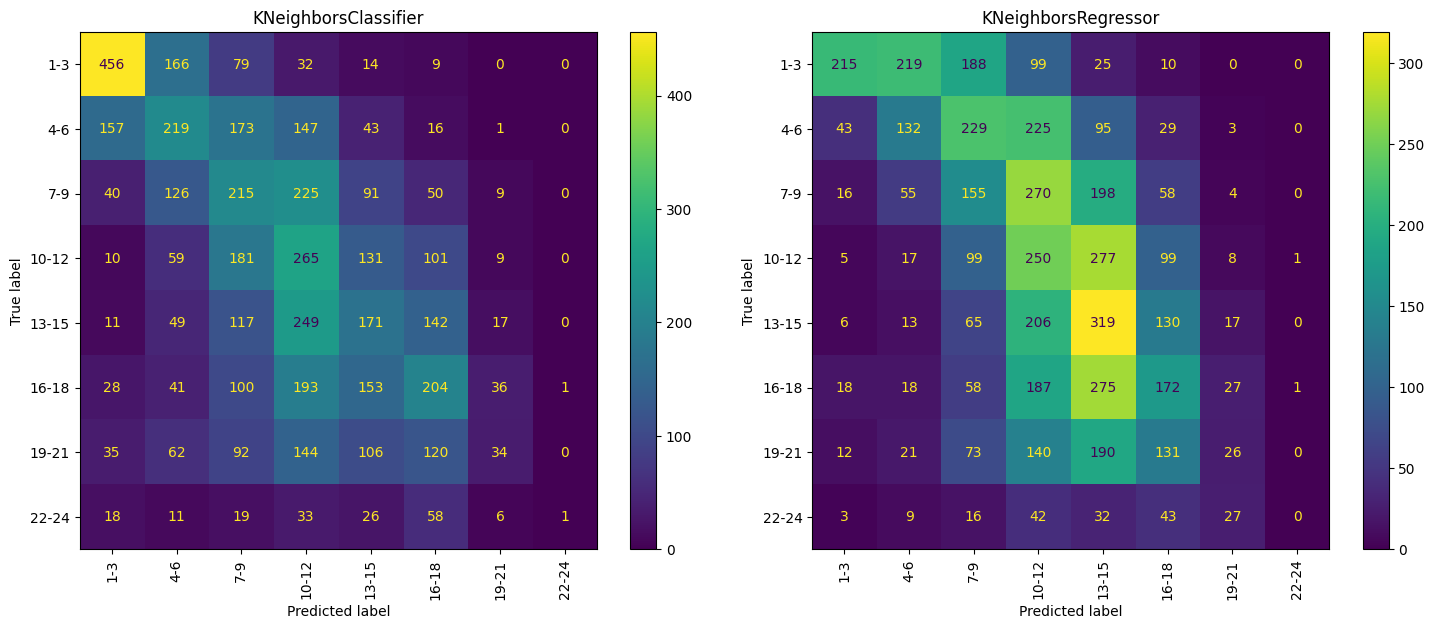

In [3]:
knn = (
    KNeighborsClassifier(n_neighbors=81, metric="manhattan", n_jobs=-1),
    KNeighborsRegressor(n_neighbors=5, metric="cosine", n_jobs=-1),
)
model_test(knn, X, y, tscv, labels=intervals)

## Decision Tree


DecisionTreeClassifier(criterion='entropy', max_depth=4):
CV with make_scorer(balanced_accuracy_score): 0.323575339217412
CV with neg_mean_absolute_error: -1.2329697556416357
              precision    recall  f1-score   support

         1-3       0.61      0.72      0.66       756
         4-6       0.36      0.41      0.39       756
         7-9       0.27      0.38      0.31       756
       10-12       0.22      0.29      0.25       756
       13-15       0.27      0.32      0.29       756
       16-18       0.36      0.21      0.26       756
       19-21       0.38      0.08      0.13       593
       22-24       0.00      0.00      0.00       172

    accuracy                           0.34      5301
   macro avg       0.31      0.30      0.29      5301
weighted avg       0.34      0.34      0.32      5301

DecisionTreeRegressor(criterion='absolute_error', max_depth=4):
CV with make_scorer(balanced_accuracy_score): 0.3156590337951401
CV with neg_mean_absolute_error: -1.172684933

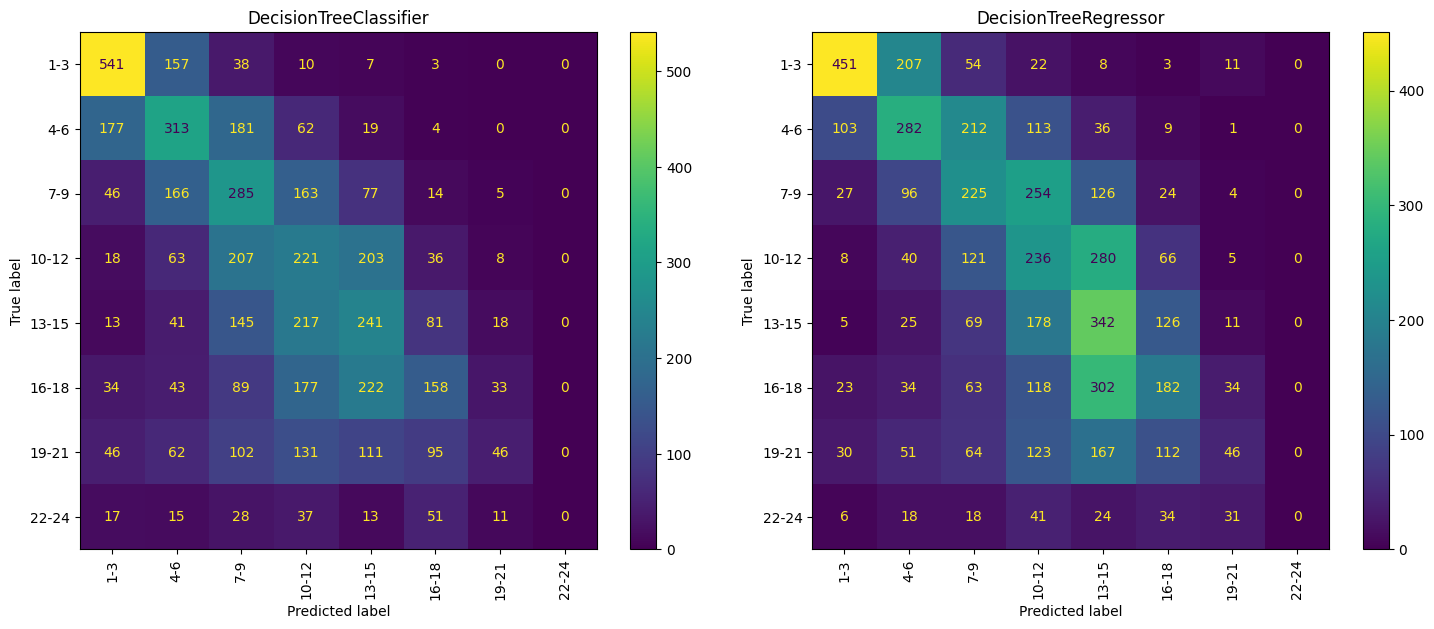

In [4]:
tree = (
    DecisionTreeClassifier(max_depth=4, criterion="entropy"),
    DecisionTreeRegressor(max_depth=4, criterion="absolute_error"),
)
model_test(tree, X, y, tscv, labels=intervals)

## Random Forest


RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       n_jobs=-1):
CV with make_scorer(balanced_accuracy_score): 0.3141850757523015
CV with neg_mean_absolute_error: -1.2731917901055565
              precision    recall  f1-score   support

         1-3       0.56      0.79      0.66       756
         4-6       0.33      0.36      0.34       756
         7-9       0.28      0.29      0.28       756
       10-12       0.24      0.34      0.28       756
       13-15       0.25      0.24      0.24       756
       16-18       0.31      0.27      0.29       756
       19-21       0.28      0.09      0.14       593
       22-24       0.08      0.01      0.01       172

    accuracy                           0.34      5301
   macro avg       0.29      0.30      0.28      5301
weighted avg       0.32      0.34      0.32      5301

RandomForestRegressor(criterion='absolute_error', max_depth=4, n_estimators=10,
                      n_jobs=-1):
CV with 

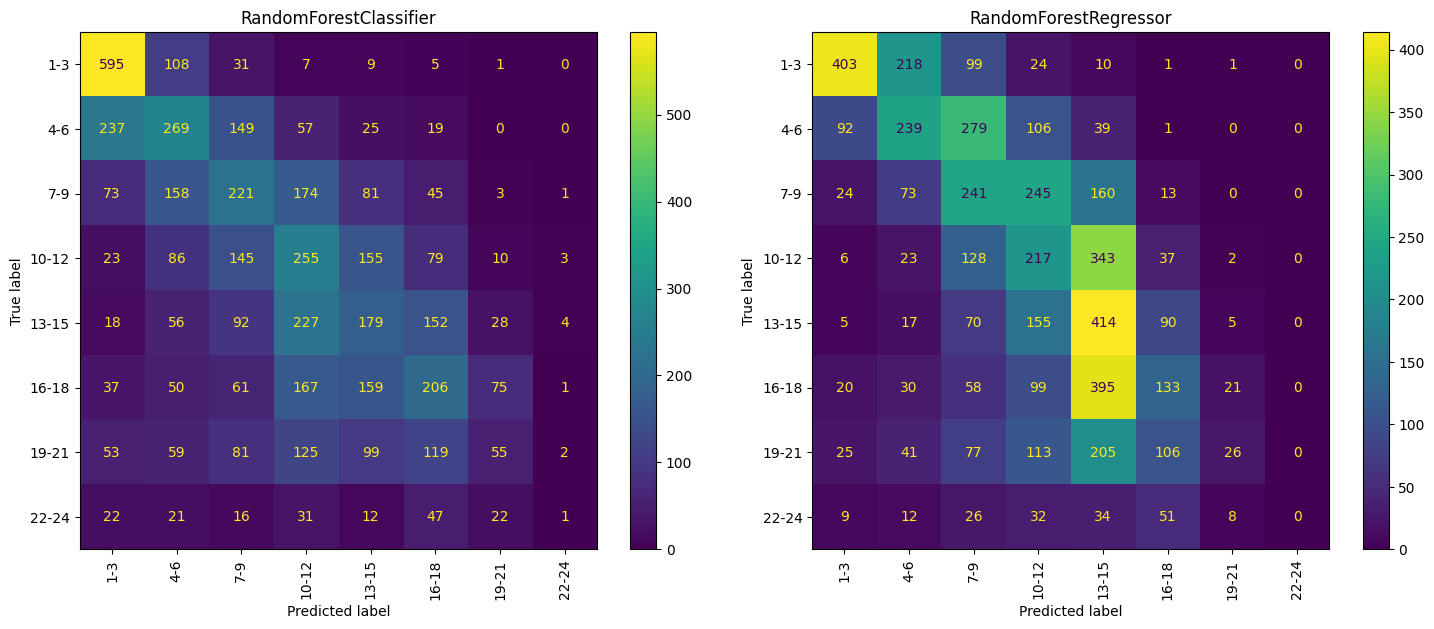

In [5]:
random_forest = (
    RandomForestClassifier(
        n_estimators=10, max_depth=4, criterion="entropy", n_jobs=-1
    ),
    RandomForestRegressor(
        n_estimators=10, max_depth=4, criterion="absolute_error", n_jobs=-1
    ),
)
model_test(random_forest, X, y, tscv, labels=intervals)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 25)):
CV with make_scorer(balanced_accuracy_score): 0.3324047224476082
CV with neg_mean_absolute_error: -1.1922957214556713
              precision    recall  f1-score   support

         1-3       0.62      0.73      0.67       756
         4-6       0.37      0.46      0.41       756
         7-9       0.29      0.35      0.31       756
       10-12       0.24      0.32      0.28       756
       13-15       0.26      0.20      0.23       756
       16-18       0.32      0.37      0.34       756
       19-21       0.30      0.05      0.09       593
       22-24       0.00      0.00      0.00       172

    accuracy                           0.35      5301
   macro avg       0.30      0.31      0.29      5301
weighted avg       0.33      0.35      0.33      5301

MLPRegressor(activation='logistic', hidden_layer_sizes=(60, 30)):
CV with make_scorer(balanced_accuracy_score): 0.2227615078577954
CV with neg_mean_absolute_error: 

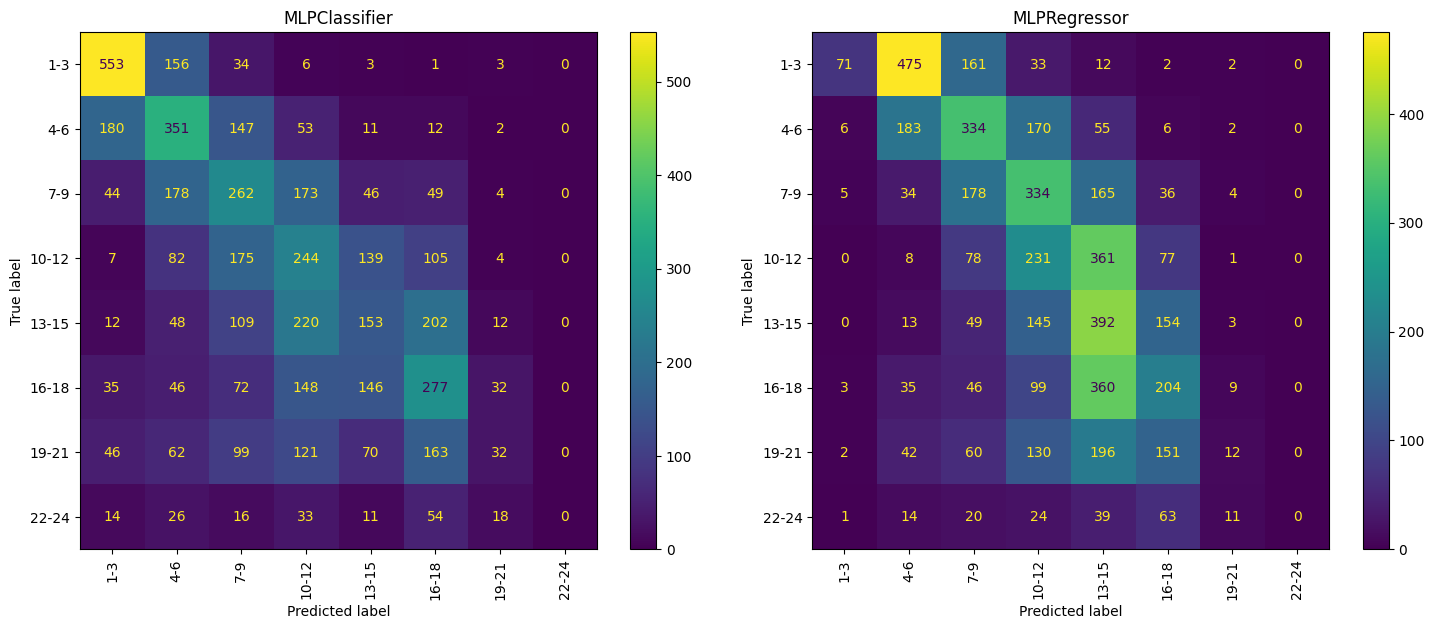

In [6]:
nn = (
    MLPClassifier(hidden_layer_sizes=(50, 25), activation="logistic"),
    MLPRegressor(hidden_layer_sizes=(60, 30), activation="logistic"),
)
model_test(nn, X, y, tscv, labels=intervals)